## Section 1 ##

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

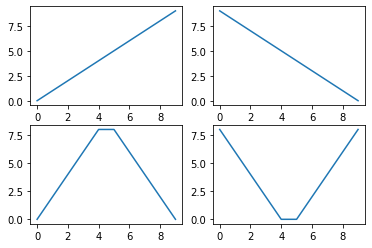

In [2]:
# testing how fig.add_subplot() works
#curves:
l1 = [0,1,2,3,4,5,6,7,8,9]
l2 = [9,8,7,6,5,4,3,2,1,0]
l3 = [0,2,4,6,8,8,6,4,2,0]
l4 = [8,6,4,2,0,0,2,4,6,8]
#ploting:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(l1)
ax2 = fig.add_subplot(2,2,2)
ax2.plot(l2)
ax3 = fig.add_subplot(2,2,3) 
ax3.plot(l3)
ax4 = fig.add_subplot(2,2,4)
ax4.plot(l4)
plt.show

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/MyDrive/Projects/machine_learning_projects/digit_recognition/

/content/drive/MyDrive/Projects/machine_learning_projects/digit_recognition


In [6]:
!ls

np_arrays  testSet  testSet.tar.gz  trainingSet  trainingSet.tar.gz


In [7]:
# unpacking testset
#!tar -xvf 'testSet.tar.gz'

In [8]:
# unpacking trainingset
#!tar -xvf 'trainingSet.tar.gz'

In [9]:
import os
os.getcwd()

'/content/drive/My Drive/Projects/machine_learning_projects/digit_recognition'

In [10]:
os.listdir()

['trainingSet', 'testSet.tar.gz', 'trainingSet.tar.gz', 'testSet', 'np_arrays']

In [11]:
t_path = os.path.join(os.getcwd(),'trainingSet')
print(t_path)

/content/drive/My Drive/Projects/machine_learning_projects/digit_recognition/trainingSet


In [ ]:
t_dict = {}
for digit in os.listdir(t_path):
  print('importing images of ' + digit)
  t_dict[digit] = []
  i = 0
  percentage = 0
  for img_dir in os.listdir(os.path.join(t_path,digit)):
    i = i+1
    img = cv2.imread(os.path.join(t_path,digit,img_dir))
    t_dict[digit].append(img)
    if i > 1000:
      percentage += 25
      i = 0
      print('{}% ................done'.format(percentage))

importing images of 0
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 1
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 2
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 3
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 4
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 5
25% ................done
50% ................done
75% ................done
importing images of 6
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 7
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 8
25% ................

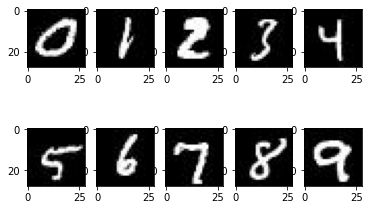

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,5,1)
plt.imshow(t_dict['0'][120])
ax = fig.add_subplot(2,5,2)
plt.imshow(t_dict['1'][400])
ax = fig.add_subplot(2,5,3)
plt.imshow(t_dict['2'][700])
ax = fig.add_subplot(2,5,4)
plt.imshow(t_dict['3'][270])
ax = fig.add_subplot(2,5,5)
plt.imshow(t_dict['4'][1500])
ax = fig.add_subplot(2,5,6)
plt.imshow(t_dict['5'][2500])
ax = fig.add_subplot(2,5,7)
plt.imshow(t_dict['6'][3200])
ax = fig.add_subplot(2,5,8)
plt.imshow(t_dict['7'][4000])
ax = fig.add_subplot(2,5,9)
plt.imshow(t_dict['8'][2530])
ax = fig.add_subplot(2,5,10)
plt.imshow(t_dict['9'][120])

In [ ]:
arr = np.array(t_dict['3'])

In [ ]:
arr.shape

(4351, 28, 28, 3)

In [ ]:
classes = list(t_dict.keys())

In [ ]:
os.mkdir('np_arrays')

In [ ]:
!ls

np_arrays  testSet  testSet.tar.gz  trainingSet  trainingSet.tar.gz


In [ ]:
for digit in classes:
  d_array = np.array(t_dict[digit])
  np.save('np_arrays/imgs_{}.npy'.format(digit),d_array)

In [12]:
os.listdir('np_arrays')

['imgs_0.npy',
 'imgs_1.npy',
 'imgs_2.npy',
 'imgs_3.npy',
 'imgs_4.npy',
 'imgs_5.npy',
 'imgs_6.npy',
 'imgs_7.npy',
 'imgs_8.npy',
 'imgs_9.npy']

In [13]:
array1 = np.load('np_arrays/imgs_5.npy')

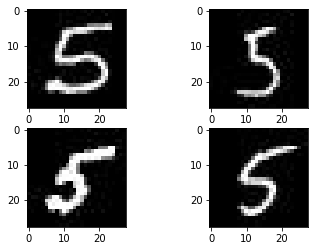

In [14]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.imshow(array1[120])
ax = fig.add_subplot(2,2,2)
plt.imshow(array1[670])
ax = fig.add_subplot(2,2,3)
plt.imshow(array1[1345])
ax = fig.add_subplot(2,2,4)
plt.imshow(array1[2670])

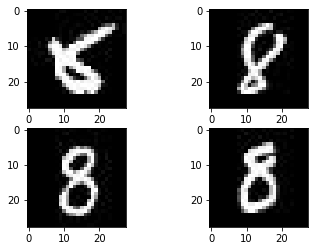

In [16]:
array2 = np.load('np_arrays/imgs_8.npy')
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.imshow(array2[120])
ax = fig.add_subplot(2,2,2)
plt.imshow(array2[670])
ax = fig.add_subplot(2,2,3)
plt.imshow(array2[1345])
ax = fig.add_subplot(2,2,4)
plt.imshow(array2[2670])

In [ ]:
# the arrays have been saved properly

## Section 2 ##
preparing data

In [14]:
import os
print(os.getcwd())
print('')
print(os.listdir())
print('')
print(os.listdir(os.path.join(os.getcwd(),'np_arrays')))

e:\Projects\ai _ml projects\Digit_Recognition

['.git', 'application.py', 'digit_recognition_code.ipynb', 'np_arrays', 'README.md']

['imgs_0.npy', 'imgs_1.npy', 'imgs_2.npy', 'imgs_3.npy', 'imgs_4.npy', 'imgs_5.npy', 'imgs_6.npy', 'imgs_7.npy', 'imgs_8.npy', 'imgs_9.npy']


In [15]:
import numpy as np
data_list = []
for file in os.listdir(os.path.join(os.getcwd(),'np_arrays')):
    data = np.load(os.path.join(os.getcwd(),'np_arrays',file))
    data_list.append(data)


In [16]:
total_list = []
class_array = np.zeros((10,1))
for i in range(10):
    class_array = np.zeros((10,1))
    class_array[i] = 1
    array_img = data_list[i]
    for image in array_img:
        xy_array = np.array([image,class_array])
        total_list.append(xy_array)

In [17]:
len(total_list)

42000

In [18]:
# shuffling the list data for to have a even distribution
from random import shuffle
shuffle(total_list)


In [19]:
data = np.array(total_list)

In [20]:
data.shape

(42000, 2)

In [24]:
np.save('np_arrays/data.npy',data)

## Section 3 ##
CNN model creation: AlexNet

In [1]:
import tensorflow as tf

### LeNet Architecture ###
1.input  
2.conv1 (6 filters, 5x5 kernel, padding- 'same')  
3.maxpooling1 (2x2 kernel, 2 stride)  
4.conv2 (16 filters, 5x5 kernel, padding- 'valid')  
5.maxpooling2 (2x2 kernel, 2 stride)  
6.fullyconnectedlayer1 (120 neurons)  
7.fullyconnectedlayer1 (84 neurons)  
8.fullyconnectedlayer1 (10 neurons)  
9.output

In [8]:
# creating a cnn model 
model = tf.keras.Sequential([tf.keras.Input(shape = (28,28,3)),
tf.keras.layers.Conv2D(6, 5, padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
tf.keras.layers.Conv2D(16, 5, padding = 'valid', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(120, activation = 'relu'),
tf.keras.layers.Dense(84,activation = 'relu'),
tf.keras.layers.Dense(10,activation = 'softmax')])

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [68]:
# compiling the model
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
    metrics = ['accuracy']
)

In [69]:
# importing data
import numpy as np
data = np.load('np_arrays/data.npy',allow_pickle= True)
train_x = data[:,0]
train_y = data[:,1]

In [70]:
print(train_x.shape)
print(train_y.shape)

(42000,)
(42000,)


In [71]:
x_list = []
for x in train_x:
    x_list.append(x)
train_x = np.array(x_list) 

y_list = []
for y in train_y:
    y_list.append(y)
train_y = np.array(y_list) 

In [72]:
print(train_x.shape)
print(train_y.shape)

(42000, 28, 28, 3)
(42000, 10, 1)


In [73]:
model.fit(train_x,train_y, epochs= 10)

Epoch 1/10


ValueError: in user code:

    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\utils\metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\metrics.py:612 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\metrics.py:3301 sparse_categorical_accuracy
        y_true = array_ops.squeeze(y_true, [-1])
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\deprecation.py:507 new_func
        return func(*args, **kwargs)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\array_ops.py:4259 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:10044 squeeze
        "Squeeze", input=input, squeeze_dims=axis, name=name)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\func_graph.py:593 _create_op_internal
        compute_device)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\ops.py:3485 _create_op_internal
        op_def=op_def)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\ops.py:1975 __init__
        control_input_ops, op_def)
    C:\Users\LYNX\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](remove_squeezable_dimensions/Squeeze)' with input shapes: [?,10].
